In [34]:
import datetime
from ebaysdk.exception import ConnectionError
from ebaysdk.finding import Connection
import seaborn as sns
import pandas as pd

In [39]:
def ebay_item_extraction(searchingType, keywords, listingType, numOfPage, condition):
#searchingType='findCompletedItems', keywords='Samsung S7 Smartphone', listingType='FixedPrice', numOfPage=100
    overall_item_list = []
    try:
        price_list=[]
        api = Connection(appid='XianyiGa-insighti-PRD-52ccbdebc-0752fbba', config_file=None)
        for i in range(1,numOfPage+1):
            response = api.execute(searchingType, {'keywords': keywords, 
                                                          'itemFilter': [{'name': 'ListingType', 'value': listingType}, 
                                                                         {'name': 'Condition', 'value': condition}],
                                                          'paginationInput': {
                                                          'entriesPerPage': '100',
                                                          'pageNumber': str(i)},
                                                         })
            
            
            assert(response.reply.ack == 'Success')
            assert(type(response.reply.timestamp) == datetime.datetime)
            assert(type(response.reply.searchResult.item) == list)

            item = response.reply.searchResult.item[0]
            assert(type(item.listingInfo.endTime) == datetime.datetime)
            assert(type(response.dict()) == dict)
            item_list = response.reply.searchResult.item
            end_item_index=len(item_list)
            overall_item_list = overall_item_list + item_list
            #print(end_item_index)
            #print(dir(item_list[0]))
            #print(dir(item_list[0].sellingStatus.currentPrice))
            #print(item_list[0].sellingStatus.sellingState)
            #print('listing info', dir(item_list[99].listingInfo.buyItNowPrice))
            #print('Store inventory: ', dir(item_list[i].listingInfo.StoreInventory))
            #print(item_list[0].listingInfo.listingType)
            
            #for i in range(0,end_item_index):
                #print(item_list[i].listingInfo.listingType)
                #print(item_list[i].sellingStatus.currentPrice)
                #print(item_list[i].title, item_list[i].condition)
            for i in range(0,end_item_index):
                #print(item_list[i].listingInfo.listingType)
                #print(item_list[i].sellingStatus.currentPrice.value)
                price_list.append(float(item_list[i].sellingStatus.currentPrice.value))
                #print(type(item_list[i].sellingStatus.currentPrice.value))
                #print(item_list[i].title)
        price_list = pd.Series(price_list, name="Price (Samsung S7 Smartphone)")
        sns.distplot(price_list)
    except ConnectionError as e:
        print(e)
        print(e.response.dict())
    return overall_item_list

/home/xianyi/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


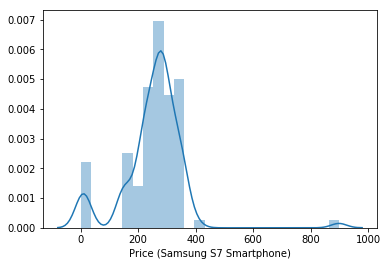

In [42]:
overall_item_list = ebay_item_extraction(searchingType='findCompletedItems', keywords='Samsung S7 Smartphone', listingType='FixedPrice', numOfPage=1, condition='New')

200
